# Aufgabe 2 - Tiefe Einblicke ins Institut

Den Code immer nachvollziehbar kommentieren! Bitte beachtet, dass das Notebook von Anfang bis Ende ohne Fehler durchlaufen muss und dass die requirements.txt Datei aktualisiert wird. 

## Teilaufgabe a): Trainings-und Testdatenset

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
import random

training_path_list = []  # ["./pfad/zu/bildA.png","./pfad/zu/bildB.png",...]
test_path_list = []  # ["./pfad/zu/bildC.png","./pfad/zu/bildD.png",...]

# add all paths to one array
flur_list = []
labor_list = []
buero_list = []
kueche_list = []

for i in range(1,26):
    flur_list.append("./Bilder/Flur/Flur%d.jpg"% i)
    labor_list.append("./Bilder/Labor/Labor%d.jpg"% i)
    buero_list.append("./Bilder/Professorenbuero/Professorenbuero%d.jpg"% i)
    kueche_list.append("./Bilder/Teekueche/Teekueche%d.jpg"% i)
    

In [20]:
# split the test and training set    
training_flur, test_flur  = train_test_split(
    flur_list, test_size=0.2, random_state=1
)
training_labor, test_labor  = train_test_split(
    labor_list, test_size=0.2, random_state=1
)
training_buero, test_buero  = train_test_split(
    buero_list, test_size=0.2, random_state=1
)
training_kueche, test_kueche  = train_test_split(
    kueche_list, test_size=0.2, random_state=1
)

training_path_list = training_flur + training_labor + training_buero + training_kueche
test_path_list = test_flur + test_labor + test_buero + test_kueche

random.shuffle(training_path_list)
random.shuffle(test_path_list)

print(test_path_list)

['./Bilder/Professorenbuero/Professorenbuero18.jpg', './Bilder/Teekueche/Teekueche14.jpg', './Bilder/Labor/Labor22.jpg', './Bilder/Labor/Labor14.jpg', './Bilder/Flur/Flur22.jpg', './Bilder/Flur/Flur14.jpg', './Bilder/Labor/Labor4.jpg', './Bilder/Flur/Flur4.jpg', './Bilder/Teekueche/Teekueche22.jpg', './Bilder/Teekueche/Teekueche4.jpg', './Bilder/Flur/Flur15.jpg', './Bilder/Labor/Labor18.jpg', './Bilder/Flur/Flur18.jpg', './Bilder/Professorenbuero/Professorenbuero4.jpg', './Bilder/Teekueche/Teekueche18.jpg', './Bilder/Professorenbuero/Professorenbuero14.jpg', './Bilder/Labor/Labor15.jpg', './Bilder/Professorenbuero/Professorenbuero22.jpg', './Bilder/Teekueche/Teekueche15.jpg', './Bilder/Professorenbuero/Professorenbuero15.jpg']


## Teilaufgabe b): Verteilung RGB

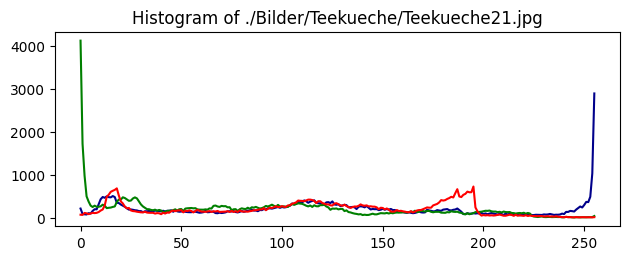

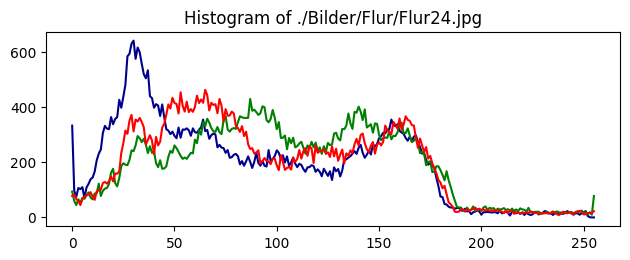

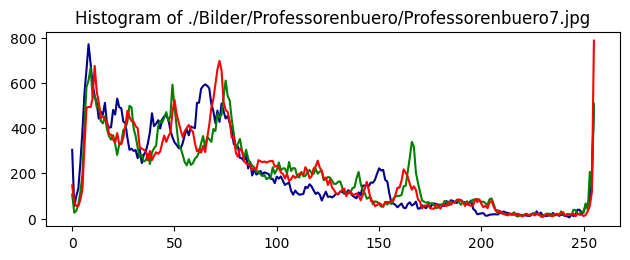

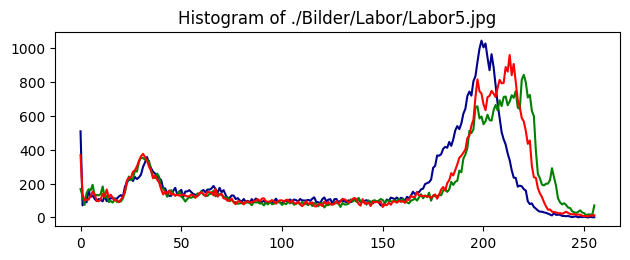

In [21]:
import cv2
import matplotlib.pyplot as plt
import random

def create_histogram(picture):
    # load the picture the histogram will be made of
    pic = cv2.imread(picture)
    
    # calculate histogram for all three channels
    blue_histogram = cv2.calcHist([pic], [0], None, [256], [0, 256])
    red_histogram = cv2.calcHist([pic], [1], None, [256], [0, 256])
    green_histogram = cv2.calcHist([pic], [2], None, [256], [0, 256]) 
    
    # create a plot with all three histograms
    plt.subplot(2,1,2)
    plt.title("Histogram of %s" % picture)
    plt.plot(blue_histogram,color="darkblue")
    plt.plot(green_histogram,color="green")
    plt.plot(red_histogram,color="red")
 
    plt.tight_layout()
    plt.show()
    
p_tk = random.choice(list(filter(lambda x: "Teekueche" in x, training_path_list)))
p_fl = random.choice(list(filter(lambda x: "Flur" in x, training_path_list)))
p_pb = random.choice(list(filter(lambda x: "Professorenbuero" in x, training_path_list)))
p_la = random.choice(list(filter(lambda x: "Labor" in x, training_path_list)))

create_histogram(p_tk)
create_histogram(p_fl)
create_histogram(p_pb)
create_histogram(p_la)

## Teilaufgabe c): Training und Test mit Random Forest 

Accuracy: 0.7
F1 Score: 0.701068376068376
Recall: 0.7
Precision: 0.7416666666666666


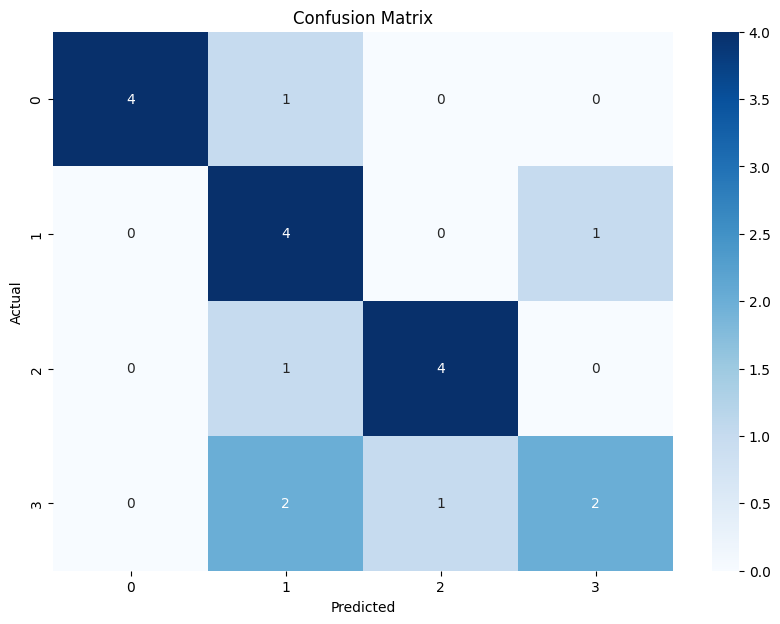

In [25]:
import seaborn as sns
import re
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Label aus Dateinamen extrahieren
def extract_label_from_filename(filename):
    match = re.match(r"([a-zA-Z]+)", filename)
    if match:
        return match.group(1)
    else:
        return None
# Array mit Trainingsdaten erstellen
def train_features():
    train_images = []
    train_labels = []
    for path in training_path_list:
        img = cv2.imread(path)
        img = img.flatten()
        train_images.append(img)
        filename = os.path.basename(path)
        label = extract_label_from_filename(filename)
        train_labels.append(label)
    return np.array(train_images), np.array(train_labels)

# Array mit Testdaten erstellen
def test_features():
    test_images = []
    test_labels = []
    for path in test_path_list:
        img = cv2.imread(path)
        img = img.flatten()
        test_images.append(img)
        filename = os.path.basename(path)
        label = extract_label_from_filename(filename)
        test_labels.append(label)
    return np.array(test_images), np.array(test_labels)

X_train, y_train = train_features()
X_test, y_test = test_features()

# Random Forest Classifier trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen auf den Testdaten treffen
y_pred = clf.predict(X_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

# Confusion Matrix darstellen
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()




## Teilaufgabe d): Hyperparameteroptimierung

Beste Hyperparameter: {'n_estimators': 50}
Accuracy: 0.6
F1 Score: 0.601068376068376
Recall: 0.6
Precision: 0.6416666666666666


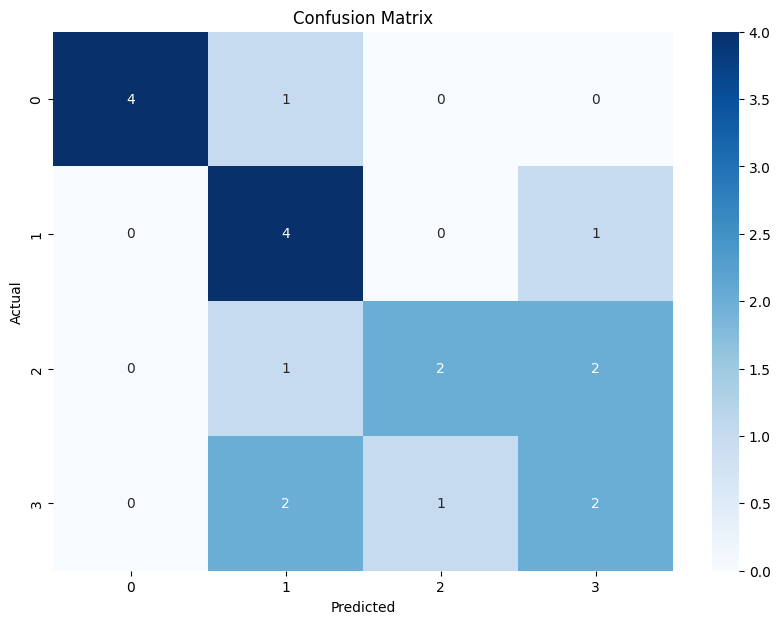

In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Optimierung
param_grid = {
    'n_estimators': [50, 100, 150]
}

clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Hyperparameter ausgeben
best_params = grid_search.best_params_
print(f'Beste Hyperparameter: {best_params}')

# Random Forest Classifier trainieren
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)


# Vorhersagen treffen
y_pred = best_clf.predict(X_test)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

# Confusion Matrix darstellen
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Teilaufgabe e): Dimensionalitätsreduktion

Beste Hyperparameter: {'n_estimators': 150}
Accuracy: 0.55
F1 Score: 0.5159188034188034
Recall: 0.55
Precision: 0.5145833333333333


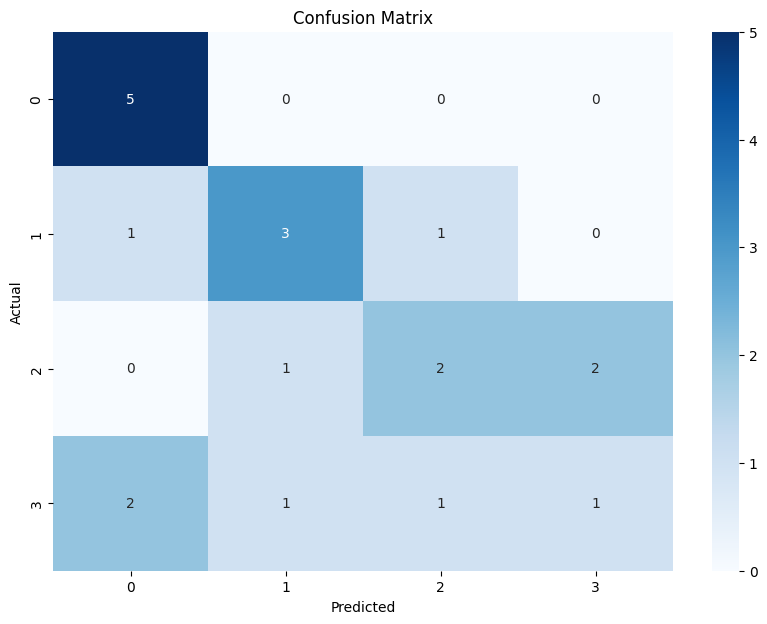

In [27]:
from sklearn.decomposition import PCA

# PCA für Dimensionalitätsreduktion anwenden
n_components = 50  
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter Optimierung unter Verwendung von PCA
param_grid = {
    'n_estimators': [50, 100, 150]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Hyperparameter ausgeben
best_params = grid_search.best_params_
print(f'Beste Hyperparameter: {best_params}')

# Random Forest Classifier trainieren
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_pca, y_train)

# Vorhersagen auf den Testdaten treffen
y_pred = best_clf.predict(X_test_pca)

# Metriken berechnen
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

# Confusion Matrix darstellen
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()